# **Practical Bayesian applications: Histograms**

How many bins should I use in a histogram? Though it is typically not necessary to bin the data before estimating
model parameters there are a number of somewhat principled ways of deciding on your bin size (other that choosing something the "makes it look good")

_Scott's rule_ suggests a bin width

$
\Delta_b = {3.5 \sigma \over N^{1/3}}
$

with $\sigma$ is the sample standard deviation, and $N$ is the sample size. This minimizes the mean integrated square error (assumes distribution is Gaussian)

<!-- TEASER_END -->

_Freedman--Diaconis rule_ generalizes this to non-Gaussian distributions

$\Delta_b = {2 (q_{75}-q_{25}) \over N^{1/3}} =  {2.7 \sigma_G \over N^{1/3}}$

which estimates the scale of the distribution from its interquartile range

For a Gaussian distribution, Scott's bin width is 30% larger than the Freedman-Diaconis

Excel (should you choose to use it) assumes $\Delta_b = N^{1/2}$ 

_Bayesian approaches_

We can think of a histogram as a piecewise constant fit to the data

Knuth showed (from Bayesian model selection) the best piecewise constant model has the number of bins, $M$, which maximizes

$F(M|\{x_i\},I)) = N \, \log M + \log\left[\Gamma\left({M\over 2}\right)\right] -M\log\left[\Gamma\left({1\over 2}\right)\right]   -\log\left[\Gamma\left(N+{M\over 2}\right)\right] + \sum_{k=1}^M  \log\left[\Gamma\left(n_k+{1 \over 2}\right)\right]$
                    
$\Gamma$ is the gamma function, and $n_k$ is the number of measurements found in bin $k$

For bin sizes that are not fixed we can extend Knuth's approach and  segmented the data into _blocks_.
The borders between two blocks being set by a series of changepoints.  The log-likelihood  function,
can be defined for each block:

$F(N_i, T_i) = N_i(\log N_i - \log T_i)$

with $N_i$ is the number of points in block $i$, and $T_i$ is the width
of block $i$.  For any set of blocks we  sum the log likelihoods. 



/Users/ajc/LSST/Software/lsst/DarwinX86/anaconda/2.2.0/lib/python2.7/site-packages/astroML/plotting/hist_tools.py:63: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if bins in ['blocks']:
/Users/ajc/LSST/Software/lsst/DarwinX86/anaconda/2.2.0/lib/python2.7/site-packages/astroML/plotting/hist_tools.py:65: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif bins in ['knuth', 'knuths']:
/Users/ajc/LSST/Software/lsst/DarwinX86/anaconda/2.2.0/lib/python2.7/site-packages/astroML/plotting/hist_tools.py:67: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif bins in ['scott', 'scotts']:
/Users/ajc/LSST/Software/lsst/DarwinX86/anaconda/2.2.0/lib/python2.7/site-packages/astroML/plotting/hist_tools.py:69: FutureWarning: elementwise comparison failed; returni

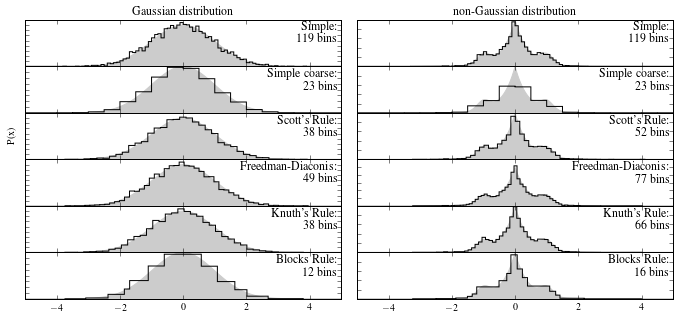

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
from astroML.plotting import hist


def plot_labeled_histogram(style, data, name,
                           x, pdf_true, ax=None,
                           hide_x=False,
                           hide_y=False):
    if ax is not None:
        ax = plt.axes(ax)

    counts, bins, patches = hist(data, bins=style, ax=ax,
                                 color='k', histtype='step', normed=True)
    ax.text(0.99, 0.95, '%s:\n%i bins' % (name, len(counts)),
            transform=ax.transAxes,
            ha='right', va='top', fontsize=12)

    ax.fill(x, pdf_true, '-', color='#CCCCCC', zorder=0)

    if hide_x:
        ax.xaxis.set_major_formatter(plt.NullFormatter())
    if hide_y:
        ax.yaxis.set_major_formatter(plt.NullFormatter())

    ax.set_xlim(-5, 5)

    return ax

def plot_simple_histogram(bins, data, name,
                           x, pdf_true, ax=None,
                           hide_x=False,
                           hide_y=False):
    
    ax = plot_labeled_histogram(bins, data, name,
                           x, pdf_true, ax, hide_x, hide_y)
    return ax


#------------------------------------------------------------
# Set up distributions:
Npts = 5000
np.random.seed(0)
x = np.linspace(-6, 6, 1000)

# Gaussian distribution
data_G = stats.norm(0, 1).rvs(Npts)
pdf_G = stats.norm(0, 1).pdf(x)

# Non-Gaussian distribution
distributions = [stats.laplace(0, 0.4),
                 stats.norm(-1.0, 0.2),
                 stats.norm(1.0, 0.2)]

weights = np.array([0.8, 0.1, 0.1])
weights /= weights.sum()

data_NG = np.hstack(d.rvs(int(w * Npts))
                    for (d, w) in zip(distributions, weights))
pdf_NG = sum(w * d.pdf(x)
             for (d, w) in zip(distributions, weights))

#------------------------------------------------------------
# Plot results
fig = plt.figure(figsize=(10, 5))
fig.subplots_adjust(hspace=0, left=0.05, right=0.95, wspace=0.05)
ax = [fig.add_subplot(6, 2, i + 1) for i in range(12)]

# first column: Gaussian distribution
inbins = np.arange(-6, 6, 0.1)
plot_simple_histogram(inbins, data_G, 'Simple', x, pdf_G,
                       ax=ax[0], hide_x=True, hide_y=True)

inbins = np.arange(-6, 6, 0.5)
plot_simple_histogram(inbins, data_G, 'Simple coarse', x, pdf_G,
                       ax=ax[2], hide_x=True, hide_y=True)

plot_labeled_histogram('scotts', data_G, 'Scott\'s Rule', x, pdf_G,
                       ax=ax[4], hide_x=True, hide_y=True)
plot_labeled_histogram('freedman', data_G, 'Freedman-Diaconis', x, pdf_G,
                       ax=ax[6], hide_x=True, hide_y=True)
plot_labeled_histogram('knuth', data_G, 'Knuth\'s Rule', x, pdf_G,
                       ax=ax[8], hide_x=False, hide_y=True)
plot_labeled_histogram('blocks', data_G, 'Blocks Rule', x, pdf_G,
                       ax=ax[10], hide_x=False, hide_y=True)
#hist(xN, bins='blocks', ax=ax, normed=True,
#         histtype='step', lw=1.5, color='k',
#         label="Bayesian Blocks")

ax[0].set_title('Gaussian distribution')
ax[4].set_ylabel('P(x)')
ax[8].set_xlabel('x')

# second column: non-gaussian distribution
inbins = np.arange(-6, 6, 0.1)
plot_simple_histogram(inbins, data_NG, 'Simple', x, pdf_NG,
                       ax=ax[1], hide_x=True, hide_y=True)

inbins = np.arange(-6, 6, 0.5)
plot_simple_histogram(inbins, data_NG, 'Simple coarse', x, pdf_NG,
                       ax=ax[3], hide_x=True, hide_y=True)

plot_labeled_histogram('scotts', data_NG, 'Scott\'s Rule', x, pdf_NG,
                       ax=ax[5], hide_x=True, hide_y=True)
plot_labeled_histogram('freedman', data_NG, 'Freedman-Diaconis', x, pdf_NG,
                       ax=ax[7], hide_x=True, hide_y=True)
plot_labeled_histogram('knuth', data_NG, 'Knuth\'s Rule', x, pdf_NG,
                       ax=ax[9], hide_x=False, hide_y=True)
plot_labeled_histogram('blocks', data_NG, 'Blocks Rule', x, pdf_NG,
                       ax=ax[11], hide_x=False, hide_y=True)

ax[1].set_title('non-Gaussian distribution')
ax[9].set_xlabel('x')

plt.show()

## Test loading of all of the packages we will be using and pulling down the data
execute the following block of code

In [1]:
from scipy.stats import lognorm
import sklearn
import pymc
from astroML.datasets import fetch_hogg2010test
data = fetch_hogg2010test()

